In [1]:
%pylab inline
import pandas as pd
import dask.dataframe as dd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import dask.array as da

In [3]:
sample=pd.read_csv("../input/sample_submission.csv")

In [4]:
sample.shape

(9463187, 5)

In [5]:
parcelids=sample['ParcelId'].values
len(parcelids)

9463187

In [22]:
if 0:
    df= dd.read_parquet("../input/scratch/home_attributes_history/"+'home_attributes_2016_v1.parq')  
    subdf=df[['parcelid',u'assessmentyear','regionidstate','regionidmsa','regionidcity','regionidzip'
              ,u'longitude',u'latitude','rawcensustractandblock','censustractandblock','regionidneighborhood',
             'censustractandblockgroupid','censustract','fips']].compute()


In [201]:
dtypes={
    "lotsizeirregularity" :np.str,
 "propertycountylandusecode"  :np.str,
 "propertystatelandusecode"  :np.str,
 "propertyzoningdesc" :np.str,
    
 "rawcensustractandblock" :np.str,
 "censustractandblock" :np.str,
 "censustractandblockgroupid" :np.str,
 "censustract" :np.str,
    
}
df=dd.read_csv("../input/scratch/home_attributes_history/"+'home_attributes_2016_v1.csv',assume_missing=True,dtype=dtypes)[['parcelid',u'assessmentyear','regionidstate','regionidmsa','regionidcity','regionidzip'
          ,u'longitude',u'latitude','rawcensustractandblock','censustractandblock','regionidneighborhood',
         'censustractandblockgroupid','censustract','fips']].compute()

/home/bo/anaconda2/lib/python2.7/multiprocessing/pool.py:113: DtypeWarning: Columns (40,128) have mixed types. Specify dtype option on import or set low_memory=False.
  result = (True, func(*args, **kwds))


In [202]:
subdf=df[['parcelid',u'assessmentyear','regionidstate','regionidmsa','regionidcity','regionidzip'
              ,u'longitude',u'latitude','rawcensustractandblock','censustractandblock','regionidneighborhood',
             'censustractandblockgroupid','censustract','fips']]

In [206]:
subdf['longitude'].min(),subdf['longitude'].max(),subdf['latitude'].min(),subdf['latitude'].max()

(-124199866.0, -2000000.0, 1600000.0, 53345878.0)

In [207]:
subdf['longitude']=subdf['longitude']/1e6
subdf['latitude']=subdf['latitude']/1e6

In [208]:
subdf['longitude'].min(),subdf['longitude'].max(),subdf['latitude'].min(),subdf['latitude'].max()

(-124.199866, -2.0, 1.6000000000000001, 53.345877999999999)

In [217]:
set(subdf['fips']//1000)

{6.0, 19.0, 36.0, 37.0, 39.0}

In [209]:
subdf[['rawcensustractandblock','censustractandblock','regionidneighborhood',
         'censustractandblockgroupid','censustract','fips']].head()

rawcensustractandblock censustractandblock  regionidneighborhood  \
0       060014033.001019      60014033001019              343604.0   
1       060014033.001024      60014033001024              343604.0   
2       060014033.001026      60014033001026              343604.0   
3       060014033.002012      60014033002012              114292.0   
4       060014030.001016      60014030001016              114292.0   

  censustractandblockgroupid  censustract    fips  
0               600140330010  60014033001  6001.0  
1               600140330010  60014033001  6001.0  
2               600140330010  60014033001  6001.0  
3               600140330020  60014033002  6001.0  
4               600140300010  60014030001  6001.0

In [215]:
len(set(subdf.rawcensustractandblock))

505221

In [216]:
len(set(subdf.censustract))

26849

In [214]:
print len('060014033.001019')
print "06",'001','4033.00','1019'

16
06 001 4033.00 1019


In [194]:
subdf.isnull().mean().to_frame().T

parcelid  assessmentyear  regionidstate  regionidmsa  regionidcity  \
0       0.0             0.0            0.0     0.030556      0.049348   

   regionidzip  longitude  latitude  rawcensustractandblock  \
0     0.000241        0.0       0.0                0.005065   

   censustractandblock  regionidneighborhood  censustractandblockgroupid  \
0             0.012271              0.689677                    0.012279   

   censustract  fips  msa  state  county  
0     0.012279   0.0  0.0    0.0     0.0

In [25]:
subdf.max().to_frame().T

parcelid  assessmentyear  longitude   latitude
0  200135066.0          2016.0       -2.0  53.345879

In [26]:
subdf.min().to_frame().T

parcelid  assessmentyear   longitude  latitude
0  8921076.0          2011.0 -124.199867       1.6

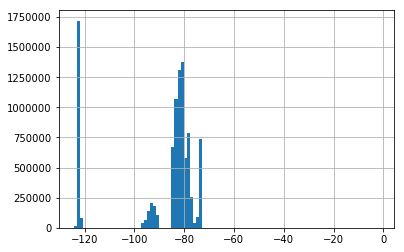

In [210]:
subdf.longitude.hist(bins=100);

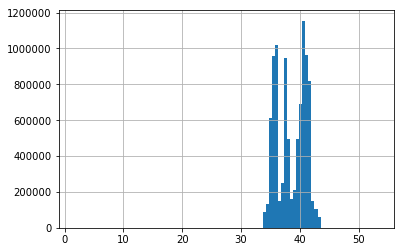

In [211]:
subdf.latitude.hist(bins=100);

In [30]:
import seaborn as sbn

In [39]:
tmp=subdf.iloc[np.random.permutation(range(len(subdf)))[:10000]]

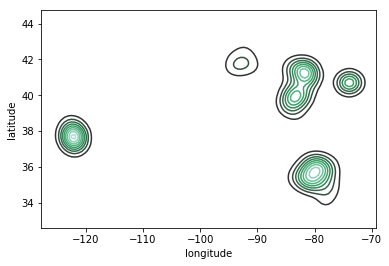

In [40]:
sbn.kdeplot(tmp.longitude,tmp.latitude)

In [43]:
pd.concat([subdf.groupby(['regionidstate' ]).mean(),subdf.groupby(['regionidstate' ]).count()/float(len(subdf))],axis=1)

parcelid  assessmentyear   longitude   latitude  parcelid  \
regionidstate                                                                  
9.0            2.372119e+07     2015.999878 -122.162315  37.696312  0.191440   
19.0           5.369322e+07     2015.897339  -93.020935  41.968872  0.077426   
36.0           1.053218e+08     2015.906372  -79.790421  35.517719  0.312924   
43.0           9.952507e+07     2016.000000  -73.925415  40.696537  0.087672   
44.0           1.086161e+08     2015.993530  -82.648117  40.549953  0.330537   

               assessmentyear  longitude  latitude  
regionidstate                                       
9.0                  0.191440   0.191440  0.191440  
19.0                 0.077426   0.077426  0.077426  
36.0                 0.312924   0.312924  0.312924  
43.0                 0.087672   0.087672  0.087672  
44.0                 0.330537   0.330537  0.330537

In [44]:
tmp=subdf[subdf.regionidstate==9]

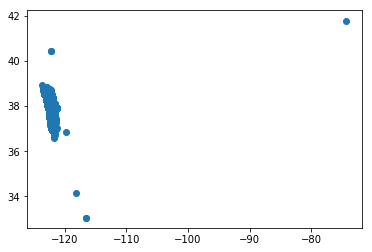

In [45]:
plt.scatter(tmp.longitude,tmp.latitude);

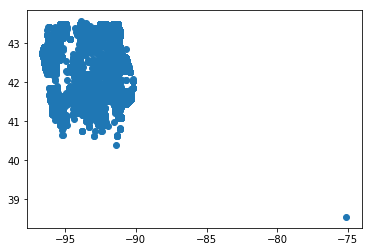

In [46]:
tmp=subdf[subdf.regionidstate==19]
plt.scatter(tmp.longitude,tmp.latitude);

In [47]:
tmp=subdf[subdf.regionidstate==36]
plt.scatter(tmp.longitude,tmp.latitude);

In [48]:
tmp=subdf[subdf.regionidstate==43]
plt.scatter(tmp.longitude,tmp.latitude);

In [49]:
tmp=subdf[subdf.regionidstate==44]
plt.scatter(tmp.longitude,tmp.latitude);

In [57]:
subdf.regionidmsa.value_counts().shape

(101,)

## use fs04ctst file

In [78]:
msainfo=pd.read_csv("../input/third/fs04ctst.csv",header=None,skip_blank_lines=True,skipfooter=2,
                    skiprows=27,usecols=range(4))
msainfo.columns=['fips','msa','state','county']
#msainfo.fips=msainfo.fips.astype(np.int32)
#msainfo.msa=msainfo.msa.astype(np.int32)

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [79]:
msainfo.tail()

fips   msa state             county
3219  72151  7440    PR  Yabucoa Municipio
3220  72153  6360    PR    Yauco Municipio
3221  78010     0    VI          St. Croix
3222  78020     0    VI           St. John
3223  78030     0    VI         St. Thomas

In [82]:
subdf.regionidmsa.isnull().mean()

0.030555839474347053

In [83]:
subdf.fips.isin(set(msainfo.fips)).mean()

1.0

In [92]:
subdf=pd.merge(subdf,msainfo, how='left',on='fips')

In [95]:
subdf[['regionidstate','state','fips']].groupby(['regionidstate','state']).count()

fips
regionidstate state         
9.0           CA     1811182
19.0          IA      732518
36.0          NC     2960528
43.0          NY      829453
44.0          OH     3127162

In [97]:
print "fips seems be reliable."

fips seems be reliable.


In [101]:
a=subdf[['regionidmsa','msa','fips']].groupby(['regionidmsa','msa']).count()

In [106]:
a.shape,subdf.regionidmsa.value_counts().shape,subdf.msa.value_counts().shape

((114, 1), (101,), (42,))

In [91]:
(subdf.regionidmsa//100).value_counts()

3944.0    2448105
3950.0    2225455
3949.0    1046975
3945.0     927001
3952.0     626425
3946.0     529761
3943.0     521626
3951.0     342864
3948.0     262742
3947.0     131056
7539.0      84479
7538.0      25270
Name: regionidmsa, dtype: int64

In [149]:
tmpdf=subdf[['regionidcity','county','fips']].groupby(['regionidcity','county']).count().reset_index().drop('fips',axis=1)

In [150]:
a=tmpdf[['regionidcity','county' ]].groupby([ 'regionidcity']).apply(lambda u: len(set(u['county'])))
b=tmpdf[['regionidcity','county' ]].groupby([ 'county']).apply(lambda u: len(set(u['regionidcity'])))
(a==1).mean() ,(b==1).mean() 

(0.47680525164113785, 0.0)

In [154]:
a.sort_values().tail()

regionidcity
5621.0      37
24457.0     38
6181.0      42
24043.0     50
0.0        129
dtype: int64

In [155]:
print "regionidcity is not reliable"

regionidcity is not reliable


In [157]:
tmpdf=subdf[['regionidstate','county','fips']].groupby(['regionidstate','county']).count().reset_index().drop('fips',axis=1)

In [158]:
a=tmpdf[['regionidstate','county' ]].groupby([ 'regionidstate']).apply(lambda u: len(set(u['county'])))
b=tmpdf[['regionidstate','county' ]].groupby([ 'county']).apply(lambda u: len(set(u['regionidstate'])))
(a==1).mean() ,(b==1).mean() 

(0.0, 0.9375)

In [159]:
b[b>1]

county
Cherokee County      2
Franklin County      2
Hancock County       2
Harrison County      2
Jackson County       2
Madison County       2
Marion County        2
Montgomery County    3
Richmond County      2
Union County         2
Warren County        3
Washington County    2
dtype: int64

In [160]:
fipsinfo=pd.read_csv("../input/third/fips_codes_website.csv")

In [168]:
fipsinfo['fips']=fipsinfo['State FIPS Code']*1000+fipsinfo['County FIPS Code']

In [170]:
fipsinfo=fipsinfo.groupby(['State Abbreviation','County FIPS Code','fips']).count().reset_index()[['State Abbreviation','County FIPS Code','fips']]

In [166]:
subdf.fips.isin(set(fipsinfo.fips)).all()

True

In [176]:
subdf[['fips','county']].drop_duplicates().shape

(206, 2)

In [178]:
len(set(subdf.fips)),len(set(subdf.msa))

(206, 42)

In [179]:
subdf.columns

Index([u'parcelid', u'assessmentyear', u'regionidstate', u'regionidmsa',
       u'regionidcity', u'regionidzip', u'longitude', u'latitude',
       u'rawcensustractandblock', u'censustractandblock',
       u'regionidneighborhood', u'censustractandblockgroupid', u'censustract',
       u'fips', u'msa', u'state', u'county'],
      dtype='object')

In [191]:
subdf.censustractandblock.fillna(-1).astype(np.int).head()

0    60014031011840
1    60014031011840
2    60014031011840
3    60014031011840
4    60014031011840
Name: censustractandblock, dtype: int64

In [190]:
subdf.censustractandblockgroupid.fillna(-1).astype(np.int).head()

0    600140349440
1    600140349440
2    600140349440
3    600140349440
4    600140283904
Name: censustractandblockgroupid, dtype: int64

In [192]:
subdf.censustract.fillna(-1).astype(np.int).head()

0    60014034944
1    60014034944
2    60014034944
3    60014034944
4    60014030848
Name: censustract, dtype: int64

In [188]:
s

0           60014034944
1           60014034944
2           60014034944
3           60014034944
4           60014030848
5           60014030848
6           60019830784
7           60014034944
8           60014039040
9           60014039040
10          60014039040
11          60014034944
12          60014034944
13          60014034944
14          60014034944
15          60014034944
16          60014034944
17          60014039040
18          60014039040
19          60014039040
20          60014039040
21          60014039040
22          60014039040
23          60014039040
24          60014039040
25          60014039040
26          60014039040
27          60014034944
28          60014039040
29          60014039040
               ...     
9460813              -1
9460814    371190071296
9460815    371190071296
9460816              -1
9460817    371190071296
9460818    370710347776
9460819              -1
9460820              -1
9460821    370710315008
9460822    370710347776
9460823    37071